In [36]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *
print ("The libraries have been loaded.")

The libraries have been loaded.


In [37]:
data = pd.read_csv(r'C:\Users\Leonardo\Desktop\Projetos Python\Pesquisa\advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [38]:
x = data.drop('Sales', axis=1)
print(x.shape)
y= data['Sales']
print(y.shape)

(200, 3)
(200,)


In [39]:
x_train_sm = sm.add_constant(x)
lr= sm.OLS(y,x_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           8.13e-99
Time:                        00:09:54   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

In [40]:
# Question 1 ok
print(f'{data.isnull().sum()}\n')

print(lr.pvalues)

print(f'\n''With the P-value, we can estimate if there is or not a relationship between the advertisements and the sales. In this case, the p-value is very low, so we can infer that there is a relationship between them.')


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

const        1.682677e-34
TV           1.892945e-95
Radio        4.602097e-27
Newspaper    9.538145e-01
dtype: float64

With the P-value, we can estimate if there is or not a relationship between the advertisements and the sales. In this case, the p-value is very low, so we can infer that there is a relationship between them.


In [41]:
#Question 2
# Mean Value
print(f'Mean Value: {np.sqrt(lr.df_resid)}\n')
# Mean squared error
print(f'RSE is: {np.sqrt(lr.mse_resid)}\n')
#Error
print(f'Percentage error: {((np.sqrt(lr.mse_resid))/(np.sqrt(lr.df_resid)))*100} % \n')
#R squared
print(f'R squared: {lr.rsquared}\n')


Mean Value: 14.0

RSE is: 1.6616951473976858

Percentage error: 11.869251052840612 % 

R squared: 0.9025912899684558



In [42]:
#Question 3 
print(f'TV P-value: {lr.pvalues.TV} \nTV T-statistic: {lr.tvalues.TV}')
print('\n')
print(f'Radio P-value: {lr.pvalues.Radio} \nRadio T-statistic: {lr.tvalues.Radio}')
print('\n')
print(f'Newspaper P-value: {lr.pvalues.Newspaper} \nNewspaper T-statistic: {lr.tvalues.Newspaper}')
print('\n')
print('In this results, we can conclude that the TV and Radio advertising have a solid relation with sales')

TV P-value: 1.892944798183285e-95 
TV T-statistic: 39.59152447549327


Radio P-value: 4.602096565404695e-27 
Radio T-statistic: 12.603856554623393


Newspaper P-value: 0.953814495225266 
Newspaper T-statistic: 0.057991479148421995


In this results, we can conclude that the TV and Radio advertising have a solid relation with sales


Confidence Intervals: 
TV: (0.052, 0.057)
Radio: (0.090, 0.124)
Newspaper: (-0.011, 0.012)

The Confidence Intervals give us indications that the variables have a relation with sales. 
In this case we can see that Newspaper is really close to zero, a indication that it is not statistically significant, considering TV and Radio


Text(0.5, 0, 'Investment')

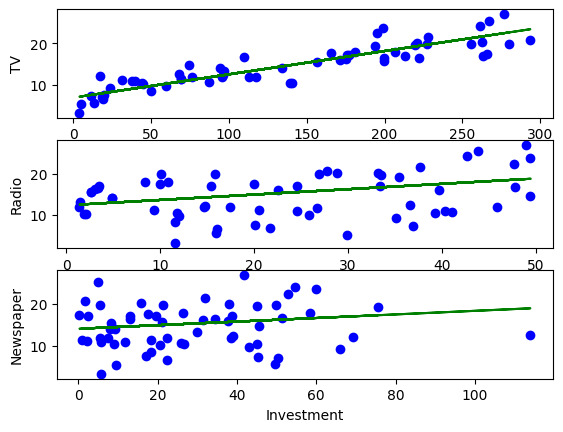

In [62]:
#Question 4

print('Confidence Intervals: \nTV: (0.052, 0.057)\nRadio: (0.090, 0.124)\nNewspaper: (-0.011, 0.012)')

print('\nThe Confidence Intervals give us indications that the variables have a relation with sales. \nIn this case we can see that Newspaper is really close to zero, a indication that it is not statistically significant, considering TV and Radio')

#Precisa achar o Variance Inflation Factor(VIF) 

#Linear Regression for every variable: 

#TV

Xtv = data['TV'].values
Xtv= Xtv.reshape(-1,1)
lrtv= LinearRegression()
xtv_train, xtv_test, y_train, y_test  = train_test_split(Xtv,y,test_size=0.3,random_state=101)
lrtv = LinearRegression() 
lmtv = lrtv.fit(xtv_train,y_train)
y_predtv = lrtv.predict(xtv_test)


#Radio

Xrad = data['Radio'].values
Xrad= Xrad.reshape(-1,1)
lrrad= LinearRegression()
xrad_train, xrad_test, yrad_train, yrad_test  = train_test_split(Xrad,y,test_size=0.3,random_state=101)
lrrad = LinearRegression() 
lmrad = lrrad.fit(xrad_train,yrad_train)
y_predrad = lrrad.predict(xrad_test)

#Newspaper

Xnp = data['Newspaper'].values
Xnp= Xnp.reshape(-1,1)
lrnp= LinearRegression()
xnp_train, xnp_test, ynp_train, ynp_test  = train_test_split(Xnp,y,test_size=0.3,random_state=101)
lrnp = LinearRegression() 
lmnp = lrnp.fit(xnp_train,ynp_train)
y_prednp = lrnp.predict(xnp_test)

#Plots

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.scatter(xtv_test, y_test, color= 'Blue')
ax1.plot(xtv_test, y_predtv, color = 'Green')
ax1.set_ylabel('TV')

ax2.scatter(xrad_test, yrad_test, color= 'Blue')
ax2.plot(xrad_test, y_predrad, color = 'Green')
ax2.set_ylabel('Radio')


ax3.scatter(xnp_test, ynp_test, color= 'Blue')
ax3.plot(xnp_test, y_prednp, color = 'Green')
ax3.set_ylabel('Newspaper')
ax3.set_xlabel('Investment')



Text(0.5, 0, 'TV')

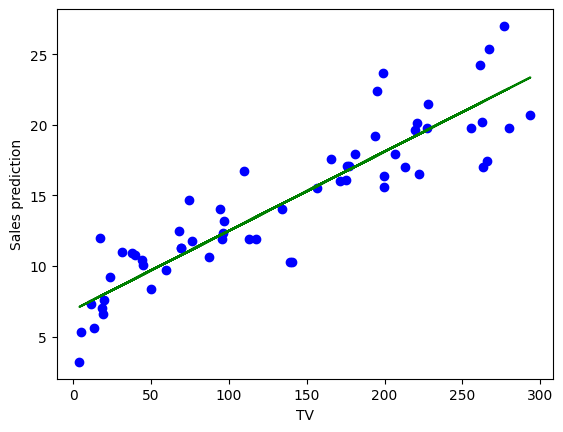

In [44]:
#Linear Regression for every variable: 

#TV


Xtv = data['TV'].values
Xtv= Xtv.reshape(-1,1)
lrtv= LinearRegression()
xtv_train, xtv_test, y_train, y_test  = train_test_split(Xtv,y,test_size=0.3,random_state=101)
lrtv = LinearRegression() 
lmtv = lrtv.fit(xtv_train,y_train)
y_predtv = lrtv.predict(xtv_test)

plt.scatter(xtv_test, y_test, color= 'Blue')
plt.plot(xtv_test, y_predtv, color = 'Green')
plt.ylabel('Sales prediction')
plt.xlabel('TV')

Text(0.5, 0, 'Radio')

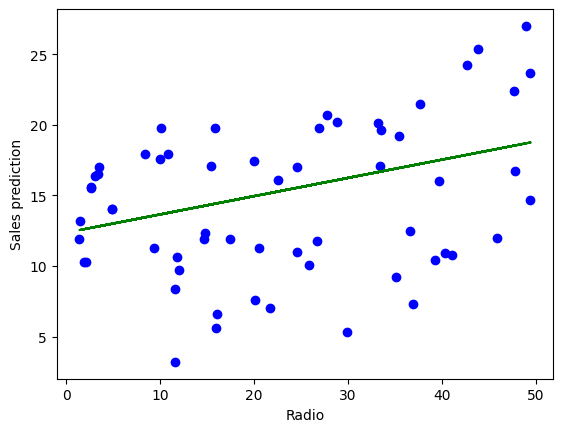

In [48]:
#Radio

Xrad = data['Radio'].values
Xrad= Xrad.reshape(-1,1)
lrrad= LinearRegression()
xrad_train, xrad_test, yrad_train, yrad_test  = train_test_split(Xrad,y,test_size=0.3,random_state=101)
lrrad = LinearRegression() 
lmrad = lrrad.fit(xrad_train,yrad_train)
y_predrad = lrrad.predict(xrad_test)

plt.scatter(xrad_test, yrad_test, color= 'Blue')
plt.plot(xrad_test, y_predrad, color = 'Green')
plt.ylabel('Sales prediction')
plt.xlabel('Radio')

Text(0.5, 0, 'Newspaper')

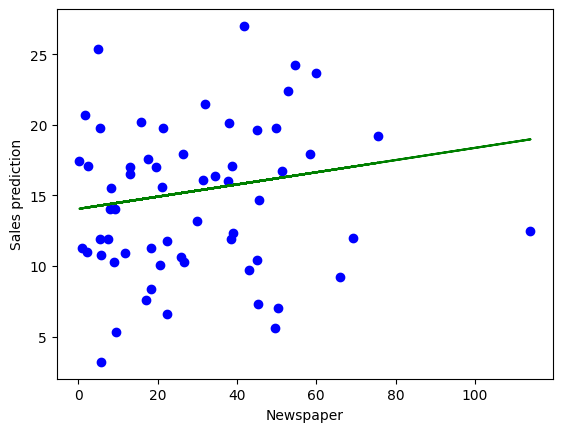

In [49]:
#Newspaper

Xnp = data['Newspaper'].values
Xnp= Xnp.reshape(-1,1)
lrnp= LinearRegression()
xnp_train, xnp_test, ynp_train, ynp_test  = train_test_split(Xnp,y,test_size=0.3,random_state=101)
lrnp = LinearRegression() 
lmnp = lrnp.fit(xnp_train,ynp_train)
y_prednp = lrnp.predict(xnp_test)

plt.scatter(xnp_test, ynp_test, color= 'Blue')
plt.plot(xnp_test, y_prednp, color = 'Green')
plt.ylabel('Sales prediction')
plt.xlabel('Newspaper')